# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
display(data.head())

Wholesale customers dataset has 440 samples with 6 features each.


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [19]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [20]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [220, 235, 240]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  14755   899     1382    1765                56           749
1   1838  6380     2824    1218              1216           295
2  22096  3575     7041   11422               343          2564

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Customer 220:  This customer has spent a signficant amount on Fresh produce.  If we look at the mean for the cost of Fresh produce purchased (12000.297727) across all customers, and we look at the total cost of Fresh produce purchased by this customer (14755).  The standard deviation is 12647.328865 for Fresh produce.  This puts the cost of Fresh produce purchased 0.22 standard deviations above the mean for this customer.  This customer also purhased significantly less Milk, Groceries and Frozen Goods than average across the population.  This makes me assume this is a medium sized market that focuses on selling produce and assorted goods.  

Customer 235:  This customer purchases significantly more Milk than average.  This leads me to believe they could be a retailer of milk based products, including protein powders, ice cream or others.

Customer 240: This customer purchased large amounts of Fresh, Grocery, Frozen and Delicatessen goods (above the mean in all cases).  This leads me to believe they are a large Supermarket.  

In [21]:
#customer 220
Fresh_Mean = 12000.297727
Fresh_Std_Dev = 12647.328865
Fresh_Customer_220 = 14755

Fresh_Standard_Devs = (Fresh_Customer_220 - Fresh_Mean)/Fresh_Std_Dev
print Fresh_Standard_Devs

0.217809017414


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data_wo_fresh = data.drop('Fresh', 1)
new_data_wo_milk = data.drop('Milk', 1)
new_data_wo_grocery = data.drop('Grocery', 1)
new_data_wo_frozen = data.drop('Frozen', 1)
new_data_wo_detergents_paper = data.drop('Detergents_Paper', 1)
new_data_wo_delicatessen = data.drop('Delicatessen', 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(new_data_wo_fresh, data['Fresh'], test_size=0.25, random_state=0)
X_train_milk, X_test_milk, y_train_milk, y_test_milk = train_test_split(new_data_wo_milk, data['Milk'], test_size=0.25, random_state=0)
X_train_grocery, X_test_grocery, y_train_grocery, y_test_grocery = train_test_split(new_data_wo_grocery, data['Grocery'], test_size=0.25, random_state=0)
X_train_frozen, X_test_frozen, y_train_frozen, y_test_frozen = train_test_split(new_data_wo_frozen, data['Frozen'], test_size=0.25, random_state=0)
X_train_detergents, X_test_detergents, y_train_detergents, y_test_detergents = train_test_split(new_data_wo_detergents_paper, data['Detergents_Paper'], test_size=0.25, random_state=0)
X_train_deli, X_test_deli, y_train_deli, y_test_deli = train_test_split(new_data_wo_delicatessen, data['Delicatessen'], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)

regressor_fresh = regressor.fit(X_train_fresh, y_train_fresh)
regressor_milk = regressor.fit(X_train_milk, y_train_milk)
regressor_grocery = regressor.fit(X_train_grocery, y_train_grocery)
regressor_frozen = regressor.fit(X_train_frozen, y_train_frozen)
regressor_detergents = regressor.fit(X_train_detergents, y_train_detergents)
regressor_deli = regressor.fit(X_train_deli, y_train_deli)

# TODO: Report the score of the prediction using the testing set
score_fresh = cross_val_score(regressor_fresh, X_test_fresh, y_test_fresh, cv=10)
score_milk = cross_val_score(regressor_milk, X_test_milk, y_test_milk, cv=10)
score_grocery = cross_val_score(regressor_grocery, X_test_grocery, y_test_grocery, cv=10)
score_frozen = cross_val_score(regressor_frozen, X_test_frozen, y_test_frozen, cv=10)
score_detergents = cross_val_score(regressor_detergents, X_test_detergents, y_test_detergents, cv=10)
score_deli = cross_val_score(regressor_deli, X_test_deli, y_test_deli, cv=10)

print "Fresh target score"
print score_fresh
print np.mean(score_fresh)
print "Milk target score"
print score_milk
print np.mean(score_milk)
print "Grocery target score"
print score_grocery
print np.mean(score_grocery)
print "Frozen target score"
print score_frozen
print np.mean(score_frozen)
print "Detergents_Paper target score"
print score_detergents
print np.mean(score_detergents)
print "Delicatessen target score"
print score_deli
print np.mean(score_deli)



Fresh target score
[-0.27354373 -0.15808933  0.17658509 -0.682621   -0.28710466  0.33971378
 -1.35781132 -0.5426468  -3.45255442 -0.90421945]
-0.71422918415
Milk target score
[ 0.29577053  0.24712915 -1.32560636  0.70980936 -1.14633721 -1.72836881
 -0.42884711  0.70156606  0.40672072 -0.13299014]
-0.240115381318
Grocery target score
[ 0.55841402  0.80194922  0.57721928  0.78857888  0.41909004  0.76519667
  0.74821038  0.68740154  0.91488271 -1.17353123]
0.508741149758
Frozen target score
[-1.35621026 -0.10307065 -3.08241877 -7.20611329 -1.94328977 -0.38955042
 -0.53479499 -2.81476522  0.11020359 -0.31644834]
-1.76364581314
Detergents_Paper target score
[ 0.75882172  0.58467281  0.63672872  0.77063218 -0.31669375  0.85822939
  0.82196853  0.79294308  0.71316111 -1.29282641]
0.432763738909
Delicatessen target score
[-1.56749563 -0.24126947  0.10235917 -0.03441474  0.11609026 -2.30181942
 -5.48828715 -1.83021471 -0.6900381   0.00602046]
-1.19290693218


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  I attempted to predict each feature separately to see how they compared in terms of prediction score.  The highest prediction score belongs to the "Grocery" feature at 0.51.  Clearly even this is not a perfect fit, on a scale of 0 to 1.  Several targets fail to fit the data at all, including Fresh, Milk, Frozen and Delicatessen.  

Given this, the Grocery feature is necessary for identifying customers' spending habits.  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

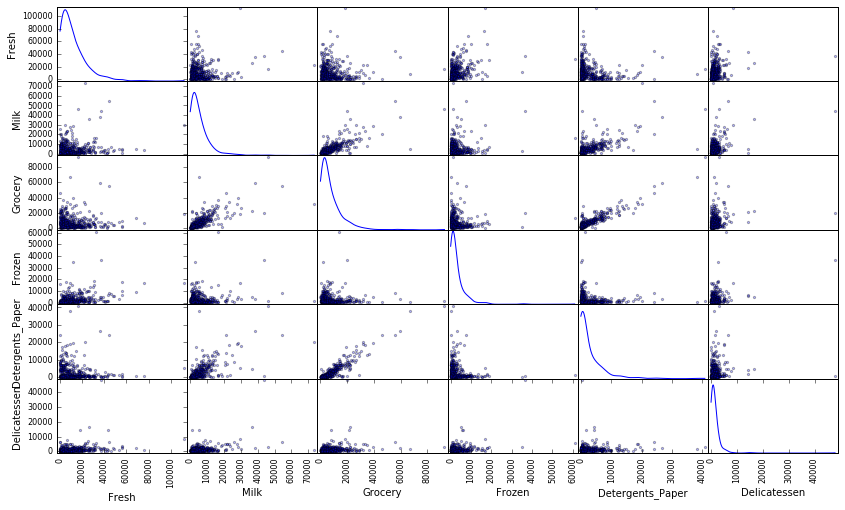

In [23]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  There appears to be a strong correlation between the amount of Groceries purchased, and the amount of Detergents_Paper and Milk purchased (this correlation runs both ways).  It is interesting to me that the amount of Frozen and Fresh goods purchased go down as more Groceries are purchased.  This is in line with what we'd expect from our predictive score of ~ 0.5 (it predicts some of the features, but not all).    

It does not appear that the data is normally distributed.  The majority of the data points lie closer to the beginning of the x-axis, with a peak and a long-tail appears afterwards.  The data looks to mimic a type of Lognormal distribution or F-distribution.  This is confirmed by looking at the statistics table above for each feature.  The difference between mean and median indicates a large skew. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

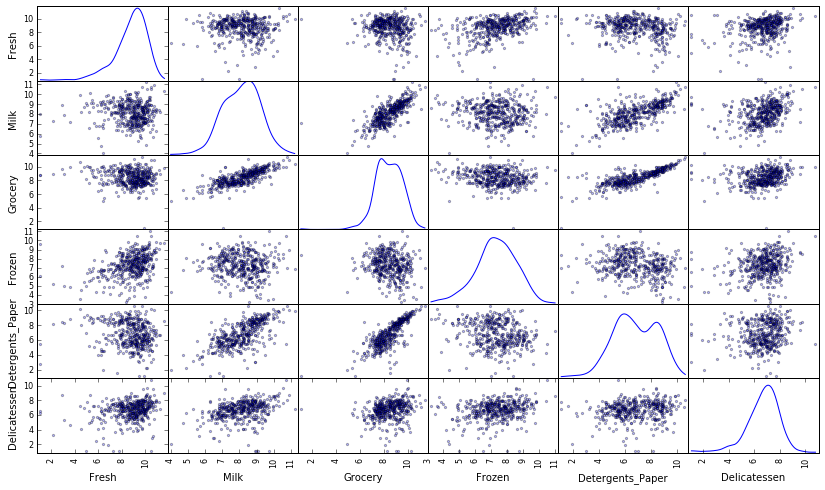

In [24]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [25]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.599337  6.801283  7.231287  7.475906          4.025352      6.618739
1   7.516433  8.760923  7.945910  7.104965          7.103322      5.686975
2  10.003152  8.181720  8.859505  9.343297          5.837730      7.849324

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [26]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  Datapoints 65, 66, 75, 128, 154 appear as outliers for multiple features.  These data points could potentially be removed from the dataset to smooth out the distribution, but they do not appear as outliers for every feature, so we can consider including them depending on our target and the features we take into consideration.  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

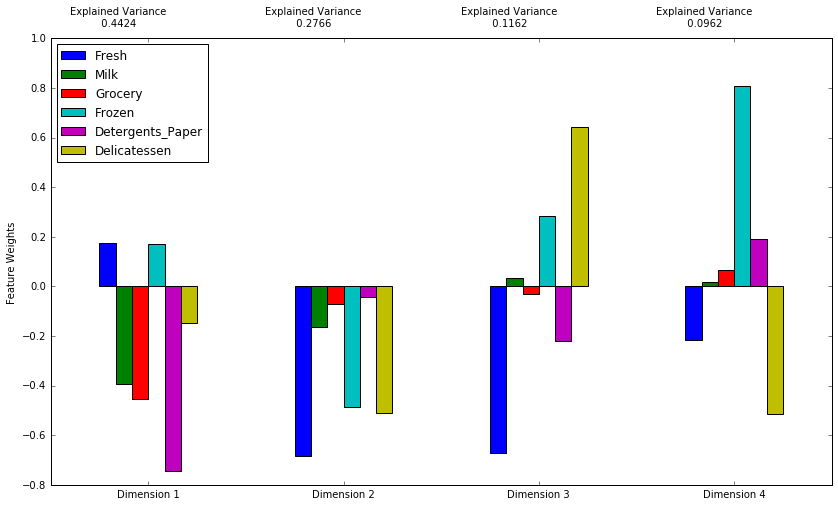

In [27]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=4)
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.fit(log_data).transform(log_data)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 
The total explained variance of the first and second principal component is: 0.719
The total explained variance of the first four principal components is: 0.9314

Based on the visualization, the first principal component shows a relationship between Milk, Grocery and Detergents_Paper.  The second principal component shows a relationship between Fresh, Frozen and Delicatessen.  The third shows an inverse relationship between Fresh, Frozen and Delicatessen.  The fourth, shows an inverse relationship between Frozen and Delicatessen. 




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [28]:
# Display sample log-data after having a PCA transformation applied

display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4
0        -1.7510      -0.0705      -0.9118      -1.7265
1        -1.8004      -0.8698       0.2128       0.0079
2        -1.8937      -1.6766       1.3189      -0.4852
3         1.1273      -1.4580       0.5247       0.4620
4        -0.7967      -2.4609       0.4706      -0.2949
5        -1.0838      -0.3929      -0.2417      -0.8931
6        -1.1326       0.2016      -1.3001      -0.6000
7        -1.5825      -0.9682       0.3626      -0.2521
8        -0.8718       0.5968      -0.5109      -0.8300
9        -2.8889      -0.7411       0.1143      -0.1801
10       -2.1162      -0.7488       0.8007       1.0355
11        0.9915      -0.0627      -0.7451      -0.0744
12       -2.2326      -1.3278      -1.0282      -1.9855
13       -1.9040      -1.3339      -1.2503       0.9372
14       -2.3334      -0.9836      -1.1135      -1.7100
15        0.4173       0.8143      -1.1793      -0.8562
16       -2.8051       1.9532       0.3815      -1.3259
17        0.2526      -0.6045       1.2207      -1.5262
18       -1.4023      -1.8655       0.0214      -0.3560
19       -1.0160       0.4151      -0.9308      -0.2209
20       -0.8361      -1.1474      -0.3482      -0.8175
21        1.7247       0.1473       0.2689       0.6106
22       -0.1549      -2.8299       0.3035       0.4400
23       -2.8213      -3.7157       1.0248      -0.4243
24       -2.0820      -2.5532       0.2522      -0.3598
25       -1.2251       1.5185      -3.2435      -0.1471
26        1.8828      -0.4287       0.1943       0.1756
27        2.3966       0.5371      -0.7066      -1.3347
28       -3.5870      -1.0724       0.9327      -0.5064
29        0.5739      -1.1438      -1.3821      -0.6141
..           ...          ...          ...          ...
410      -0.4905      -0.4176       0.3251      -0.3880
411       0.7186      -0.0765       2.1357      -0.8989
412      -2.1872       5.3355       0.0958       0.2991
413      -0.1083      -1.7286       1.5791       1.5070
414       0.5341      -0.0269      -0.2964       1.6193
415      -1.6091      -0.8660       0.1365      -0.0779
416      -2.5571       0.0519      -0.2069      -0.0350
417      -1.9324       0.4698      -0.3800      -0.9193
418      -3.3129       2.3830       0.3566      -0.9655
419      -0.3274      -0.1607      -0.1562      -1.0379
420      -3.0210       1.6924      -1.0359      -3.0513
421      -1.4638      -1.0988      -0.5610      -0.6254
422       0.4355      -0.7857      -0.8997      -1.0146
423      -0.4212      -0.5136      -1.0544      -0.2749
424      -1.0853       0.0548      -1.8876       0.2519
425       2.3393      -1.8132       1.2958       0.8623
426      -2.0896      -1.6483      -0.1086       0.4152
427       0.4400      -2.6778       0.0300       1.2291
428      -0.1420       0.6599       0.0313       0.9414
429       1.4207       1.0891       0.0429      -3.9243
430      -0.1258       0.3686       1.0758      -1.2769
431      -0.2331      -1.7325       0.7459       1.4789
432       0.1273       0.4951      -1.8795      -1.2274
433       0.9286       0.5725       1.4072      -0.2867
434      -1.0119      -0.4446      -1.0734      -0.6405
435       0.6061      -2.8920       0.5783       0.6951
436       3.1849      -2.0078       0.3008      -0.6217
437      -3.7479      -0.9272      -0.9890      -0.9276
438       1.6580      -0.4760       0.5671      -1.2806
439       0.7379       3.6344      -1.9705      -1.1258

[440 rows x 4 columns]

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.fit(log_data).transform(log_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0        -1.7510      -0.0705
1        -1.8004      -0.8698
2        -1.8937      -1.6766
3         1.1273      -1.4580
4        -0.7967      -2.4609
5        -1.0838      -0.3929
6        -1.1326       0.2016
7        -1.5825      -0.9682
8        -0.8718       0.5968
9        -2.8889      -0.7411
10       -2.1162      -0.7488
11        0.9915      -0.0627
12       -2.2326      -1.3278
13       -1.9040      -1.3339
14       -2.3334      -0.9836
15        0.4173       0.8143
16       -2.8051       1.9532
17        0.2526      -0.6045
18       -1.4023      -1.8655
19       -1.0160       0.4151
20       -0.8361      -1.1474
21        1.7247       0.1473
22       -0.1549      -2.8299
23       -2.8213      -3.7157
24       -2.0820      -2.5532
25       -1.2251       1.5185
26        1.8828      -0.4287
27        2.3966       0.5371
28       -3.5870      -1.0724
29        0.5739      -1.1438
..           ...          ...
410      -0.4905      -0.4176
411       0.7186      -0.0765
412      -2.1872       5.3355
413      -0.1083      -1.7286
414       0.5341      -0.0269
415      -1.6091      -0.8660
416      -2.5571       0.0519
417      -1.9324       0.4698
418      -3.3129       2.3830
419      -0.3274      -0.1607
420      -3.0210       1.6924
421      -1.4638      -1.0988
422       0.4355      -0.7857
423      -0.4212      -0.5136
424      -1.0853       0.0548
425       2.3393      -1.8132
426      -2.0896      -1.6483
427       0.4400      -2.6778
428      -0.1420       0.6599
429       1.4207       1.0891
430      -0.1258       0.3686
431      -0.2331      -1.7325
432       0.1273       0.4951
433       0.9286       0.5725
434      -1.0119      -0.4446
435       0.6061      -2.8920
436       3.1849      -2.0078
437      -3.7479      -0.9272
438       1.6580      -0.4760
439       0.7379       3.6344

[440 rows x 2 columns]

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means Clustering Advantages:** 
K-means is the simplest algorithm when compared to other clustering models. It is easy and lightweight to implement and to run (simply choose "k" and run the algorithm a chosen number of times).

The more intensive algorithms are much harder to implement efficiently and take much more time and memory to run.  You can see factors of 100x in runtime differences.  The other algorithms also have many more parameters to set.

**Gaussian Mixture Model Avantages:**
GMM is significantly more flexible in terms of cluster covariance.  Cluster assignment is much more flexible in GMM than in k-means.  It allows for clusters of elongated points of data, as opposed to primarily spherical/circular as in k-means.  

Also, GMM allows for mixed membership of points to clusters. In kmeans, a point belongs to one and only one cluster. In GMM a point belongs to each cluster to a different degree.

**Which Model to Use**

Based on the data and the scatterplots shown above, I would want to use Kmeans clustering, due to its speed advantages, and the signficant amount of data points we have as compared to the number of features (less chance of the curse of dimensionality).  We also have very distinct clumps of data and relationships.  It is also simpler, and requires less input to get up and running.  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
#using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

number_clusters = [2,3,4,5,6,7,8,9,10,12,14,16,18,20]

for num in number_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=num, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "Number Clusters:" + str(num)
    print "Score:" + str(score)

Number Clusters:2
Score:0.419166083203
Number Clusters:3
Score:0.393678525808
Number Clusters:4
Score:0.330208290907
Number Clusters:5
Score:0.343875059474
Number Clusters:6
Score:0.360170736113
Number Clusters:7
Score:0.351914022894
Number Clusters:8
Score:0.354846592397
Number Clusters:9
Score:0.359638155936
Number Clusters:10
Score:0.348645491242
Number Clusters:12
Score:0.339293594144
Number Clusters:14
Score:0.372954873338
Number Clusters:16
Score:0.358365908893
Number Clusters:18
Score:0.329800598786
Number Clusters:20
Score:0.336660041639


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 clusters results in the best silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_data)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

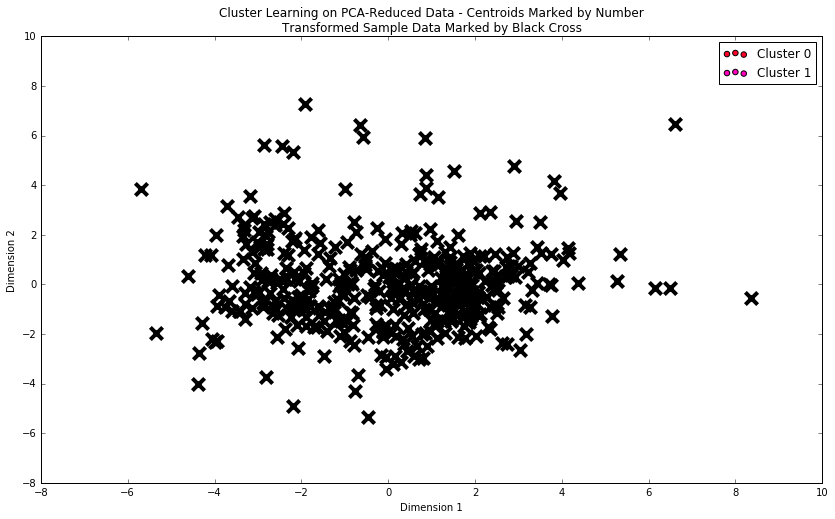

In [16]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8994.0  1909.0   2366.0  2081.0             290.0         681.0
Segment 1  3570.0  7749.0  12463.0   900.0            4567.0         966.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  As postulated earlier, these could be either cafes, small markets, or super markets.  Certain customers like cafes and smaller establishments seem to only purchase Fresh produce for use that day, whereas large providers buy a variety in bulk for weekly use.    

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [53]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1
Sample point 5 predicted to be in Cluster 1
Sample point 6 predicted to be in Cluster 1
Sample point 7 predicted to be in Cluster 1
Sample point 8 predicted to be in Cluster 1
Sample point 9 predicted to be in Cluster 1
Sample point 10 predicted to be in Cluster 1
Sample point 11 predicted to be in Cluster 0
Sample point 12 predicted to be in Cluster 1
Sample point 13 predicted to be in Cluster 1
Sample point 14 predicted to be in Cluster 1
Sample point 15 predicted to be in Cluster 0
Sample point 16 predicted to be in Cluster 1
Sample point 17 predicted to be in Cluster 0
Sample point 18 predicted to be in Cluster 1
Sample point 19 predicted to be in Cluster 1
Sample point 20 predicted to be in Cluster 1
Sample point 21 predicted to be in Cluster 0
Sample point 22 pred

**Answer:**  Earlier in the analysis, we picked indices 220, 235, and 240 to observe.  220 and 240 belong to cluster 0, and 235 belong to cluster 1.  

This is fairly consistent with what we predicted earlier (that 220 and 240 are both larger prodviders, whereas 235 is a smaller operation focused on primarily milk products alone):

Earlier Predictions:

Customer 220: This customer has spent a signficant amount on Fresh produce. If we look at the mean for the cost of Fresh produce purchased (12000.297727) across all customers, and we look at the total cost of Fresh produce purchased by this customer (14755). The standard deviation is 12647.328865 for Fresh produce. This puts the cost of Fresh produce purchased 0.22 standard deviations above the mean for this customer. This customer also purhased significantly less Milk, Groceries and Frozen Goods than average across the population. This makes me assume this is a medium sized market that focuses on selling produce and assorted goods.

Customer 235: This customer purchases significantly more Milk than average. This leads me to believe they could be a retailer of milk based products, including protein powders, ice cream or others.

Customer 240: This customer purchased large amounts of Fresh, Grocery, Frozen and Delicatessen goods (above the mean in all cases). This leads me to believe they are a large Supermarket.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Now that we have some clusters, we can determine which customers belong to which cluster and then determine which cluster of customers had issues with changes that occur during an A/B test like this in the past.  If one of the clusters of customers, based on this data, had overwhelming complaints, I would go with the other customer cluster for tests.


### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**  Some features that would be interesting and enlightening to include could revolve around annual budget, revenues, foot traffic and frequency of purchase.  

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

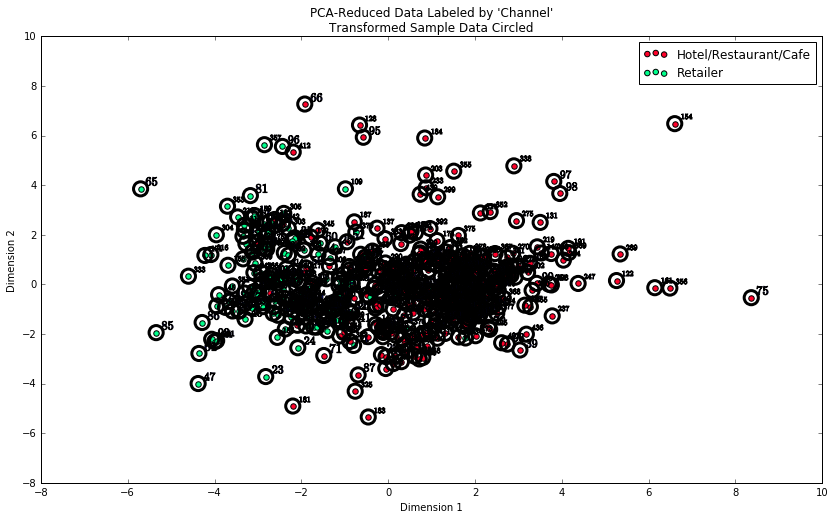

In [54]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  The clustering algorithm (K-Means) and number of clusters (2) measures up well with the actual data above.  There are indeed two clusters of customers by type (Retailers and Hotel/Restaurant/Cafe).  There definitely appears to be two distinct clusters of customers segments that can be classified as Retailers and Hotels/Restaurants/Cafes.  There is some overlap in the clusters, but that is to be expected in real life data.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.